In [67]:
import pickle # to save models 
from sklearn.model_selection import train_test_split # to split data into traaining-testing sets
from sklearn.metrics import accuracy_score # to measure model accuracy
import numpy as np # to do calculations 
import matplotlib.pyplot as plt # to plot results
from tensorflow import keras # to access neural networks settings 

from tensorflow.keras.models import Model, Sequential # to initialize model
from tensorflow.keras.layers import Dense # to create dense layers
from tensorflow.keras import optimizers # to access optimizers
from tensorflow.keras.utils import to_categorical # to transform labels to categorical values

In [68]:
data_dict = pickle.load(open('data.pickle', 'rb')) # load one-hand data

data = np.asarray(data_dict['data']) # extract data
labels = np.asarray(data_dict['labels']) # extract labels

In [69]:
labels_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', # use dict to encode an decode data
               5: 'G', 6: 'H', 7: 'I', 8: 'J',
               9: 'K', 10: 'L', 11: 'M', 12: 'N',
               13: 'O', 14: 'P',
               15: 'R', 16: 'S', 17: 'T', 18: 'U',
               19: 'V', 20: 'W', 21: 'Y',
               22: 'Z'}

In [70]:
inverse_dict = {value: key for key, value in labels_dict.items()} # decoding data

In [71]:
mapped_list = [inverse_dict[value] for value in labels] # change leteers to encode number variable

In [72]:
labels_cat = to_categorical(mapped_list) # transfrom labels to categorical

In [73]:
x_train, x_test, y_train, y_test = train_test_split(data, labels_cat, test_size=0.2, shuffle=True, stratify=labels) # split train-test (80 - 20)

In [74]:
data_shape = x_train.shape[1:] # extract shape

In [75]:
model_1 = Sequential([ # create model for one hand
        Dense(42, activation='sigmoid', name = "DenseLayer_1", input_shape=data_shape), # just needed a 1 Dense layer
        Dense(23, activation='softmax', name = "Output") # output layer
])

In [76]:
model_1.summary() # summarize model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 DenseLayer_1 (Dense)        (None, 42)                1806      
                                                                 
 Output (Dense)              (None, 23)                989       
                                                                 
Total params: 2,795
Trainable params: 2,795
Non-trainable params: 0
_________________________________________________________________


In [77]:
alpha = 1e-2 # learning rate
opt =  keras.optimizers.Adam(learning_rate=alpha, weight_decay=1e-4) # compile optimizer
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # compile model

In [78]:
history = model_1.fit(x_train, y_train, epochs=20, batch_size=10, validation_split=0.10) # train the model

Epoch 1/20
276/276 [==============================] - 1s 2ms/step - loss: 2.1776 - accuracy: 0.3975 - val_loss: 1.1762 - val_accuracy: 0.7948
Epoch 2/20
276/276 [==============================] - 0s 1ms/step - loss: 0.7937 - accuracy: 0.8399 - val_loss: 0.5195 - val_accuracy: 0.9121
Epoch 3/20
276/276 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.9395 - val_loss: 0.3093 - val_accuracy: 0.9349
Epoch 4/20
276/276 [==============================] - 0s 1ms/step - loss: 0.2414 - accuracy: 0.9659 - val_loss: 0.1997 - val_accuracy: 0.9837
Epoch 5/20
276/276 [==============================] - 0s 985us/step - loss: 0.1643 - accuracy: 0.9815 - val_loss: 0.1364 - val_accuracy: 0.9837
Epoch 6/20
276/276 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.9848 - val_loss: 0.1096 - val_accuracy: 0.9837
Epoch 7/20
276/276 [==============================] - 0s 996us/step - loss: 0.0940 - accuracy: 0.9851 - val_loss: 0.1007 - val_accuracy: 0.9870
Ep

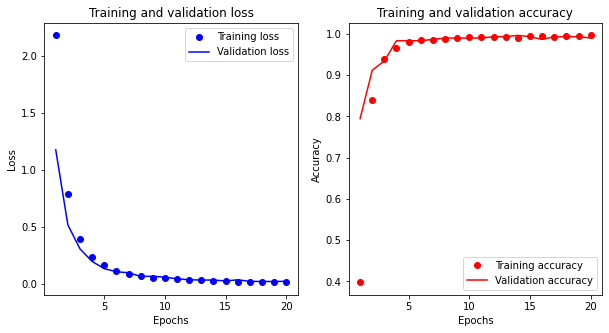

In [79]:
acc = history.history['accuracy'] # extract accuracy of every epoch
val_acc = history.history['val_accuracy'] # extract validation_accuracy of every epoch
loss = history.history['loss'] # extract loss of every epoch
val_loss = history.history['val_loss'] # extract validation_loss of every epoch

epochs = range(1, len(acc)+1)

# plot results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [80]:
y_predict = model_1.predict(x_test) # predict test set

score = accuracy_score(y_predict.argmax(axis = 1), y_test.argmax(axis = 1)) # get accuracy of testing results

print('{}% of samples were classified correctly !'.format(score * 100)) # results

24/24 [==============================] - 0s 718us/step
99.08735332464146% of samples were classified correctly !


In [81]:
model_1.save("model_redes_one_hand.h5") # svae model 

In [82]:
data_dict_2 = pickle.load(open('data_dos_manos.pickle', 'rb')) # load two-hands data

data = np.asarray(data_dict_2['data']) # extract data
labels = np.asarray(data_dict_2['labels']) # extract labels

In [83]:
labels_dict = {0: 'F', 1: 'Enie', 2: 'Q', 3: 'X'} # use dict to encode an decode data

In [84]:
inverse_dict = {value: key for key, value in labels_dict.items()} # decoding data

In [85]:
mapped_list = [inverse_dict[value] for value in labels] # change leteers to encode number variable

In [86]:
labels_cat = to_categorical(mapped_list) # transfrom labels to categorical

In [87]:
x_train, x_test, y_train, y_test = train_test_split(data, labels_cat, test_size=0.2, shuffle=True, stratify=labels) # split train-test (80 - 20)

In [88]:
data_shape = x_train.shape[1:] # extract shape

In [89]:
model_2 = Sequential([ # create model for two hands
        Dense(10, activation='relu', input_shape=data_shape), # just needed a 1 Dense layer
        Dense(4, activation='softmax', name = "Output") # output layer
])

In [90]:
model_2.summary() # summarize model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                850       
                                                                 
 Output (Dense)              (None, 4)                 44        
                                                                 
Total params: 894
Trainable params: 894
Non-trainable params: 0
_________________________________________________________________


In [91]:
alpha = 9e-4 # learning rate
opt =  keras.optimizers.Adam(learning_rate=alpha, weight_decay=1e-4) # compile optimizer
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # compile model

In [92]:
history = model_2.fit(x_train, y_train, epochs=20, batch_size=10, validation_split=0.10) # train the model

Epoch 1/20
54/54 [==============================] - 1s 4ms/step - loss: 1.2690 - accuracy: 0.2737 - val_loss: 1.1906 - val_accuracy: 0.6833
Epoch 2/20
54/54 [==============================] - 0s 1ms/step - loss: 1.1004 - accuracy: 0.6127 - val_loss: 1.0212 - val_accuracy: 0.6333
Epoch 3/20
54/54 [==============================] - 0s 1ms/step - loss: 0.9623 - accuracy: 0.5829 - val_loss: 0.8761 - val_accuracy: 0.6333
Epoch 4/20
54/54 [==============================] - 0s 1ms/step - loss: 0.8448 - accuracy: 0.6369 - val_loss: 0.7585 - val_accuracy: 0.8500
Epoch 5/20
54/54 [==============================] - 0s 1ms/step - loss: 0.7417 - accuracy: 0.7784 - val_loss: 0.6569 - val_accuracy: 0.9000
Epoch 6/20
54/54 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.8026 - val_loss: 0.5704 - val_accuracy: 0.8667
Epoch 7/20
54/54 [==============================] - 0s 1ms/step - loss: 0.5706 - accuracy: 0.8045 - val_loss: 0.5010 - val_accuracy: 0.8833
Epoch 8/20
54/54 [==

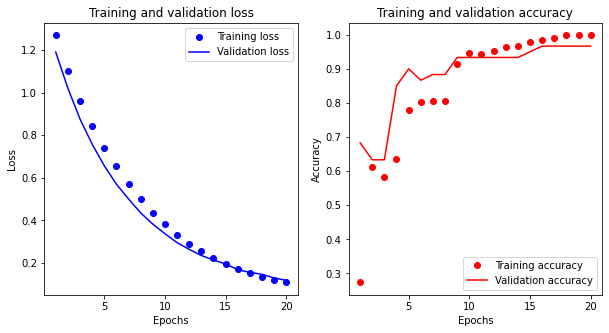

In [93]:
acc = history.history['accuracy'] # extract accuracy of every epoch
val_acc = history.history['val_accuracy'] # extract validation_accuracy of every epoch
loss = history.history['loss'] # extract loss of every epoch
val_loss = history.history['val_loss'] # extract validation_loss of every epoch

epochs = range(1, len(acc)+1)

# plot results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [94]:
y_predict = model_2.predict(x_test) # predict test set

score = accuracy_score(y_predict.argmax(axis = 1), y_test.argmax(axis = 1)) # get accuracy of testing results

print('{}% of samples were classified correctly !'.format(score * 100)) # results

5/5 [==============================] - 0s 1ms/step
99.33333333333333% of samples were classified correctly !


In [95]:
model_2.save("model_redes_two_hand.h5") # save model